# DECISION TREE CLASSIFIER

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bondora_Features_Selection_File.csv')

In [ ]:
df.shape

(134529, 12)

In [ ]:
df.head()

,Unnamed: 0,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


In [ ]:
df.columns

Index(['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'Target'],
      dtype='object')

In [ ]:
#split dataset in features and target variable
feature_cols = ['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       ]
X = df[feature_cols] # Features
y = df.Target # Target variable

TEST TRAIN SPLIT

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


SPLITTED SHAPE

In [ ]:
import numpy as np
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (107623, 10)
y_train: (107623,)
X_test: (26906, 10)
y_test: (26906,)


DECISION TREE BASED ON GINI INDEX

MODEL-1

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model= model.fit(X_train,y_train)



TEXTUAL TREE REPRESENATION

In [ ]:
from sklearn import tree
text_representation=tree.export_text(model)
print(text_representation)

|--- feature_7 <= 109.79
|   |--- feature_7 <= 26.20
|   |   |--- feature_6 <= 335.52
|   |   |   |--- feature_9 <= 13.72
|   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |--- feature_4 <= 490.12
|   |   |   |   |   |   |--- feature_6 <= 24.56
|   |   |   |   |   |   |   |--- feature_2 <= 113.59
|   |   |   |   |   |   |   |   |--- feature_4 <= 483.49
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 32.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 429.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  429.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  32.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  483.49
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 484.24
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- fea

PREDICT VALUES

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
import sklearn.metrics as metrics
print("Classification report - \n", metrics.classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     18288
           1       0.91      0.91      0.91      8618

    accuracy                           0.94     26906
   macro avg       0.93      0.93      0.93     26906
weighted avg       0.94      0.94      0.94     26906



Text(0.5, 1.0, 'Accuracy Score: 0.9406080428157289')

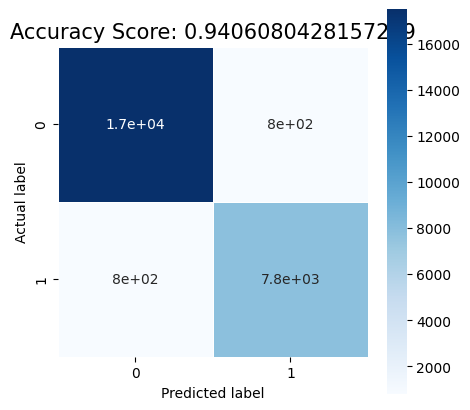

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[17487   801]
 [  797  7821]]


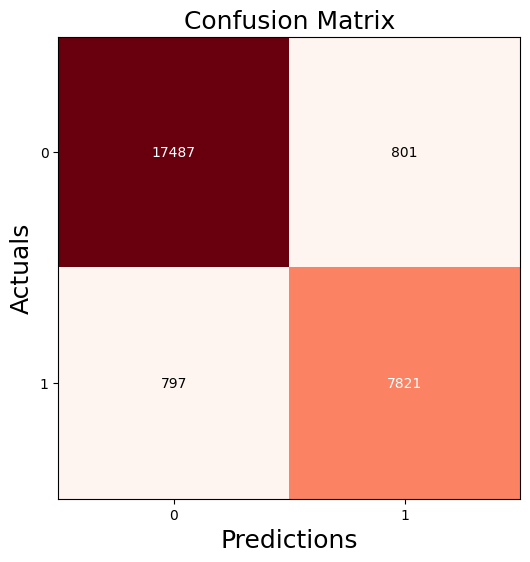

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm1, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9406080428157289


DECISION TREE BASED ON ENTROPY

MODEL-2

In [ ]:
# Create Decision Tree classifer object
model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_2 = model_2.fit(X_train,y_train)



PREDICT THE TEST OUTPUT

In [ ]:
#Predict the response for test dataset
y_pred = model_2.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
import sklearn.metrics as metrics
print("Classification report - \n", metrics.classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     18288
           1       0.97      0.81      0.88      8618

    accuracy                           0.93     26906
   macro avg       0.94      0.90      0.91     26906
weighted avg       0.93      0.93      0.93     26906



CONFUSION MATRIX BASED ON SCORE

Text(0.5, 1.0, 'Accuracy Score: 0.9292351148442727')

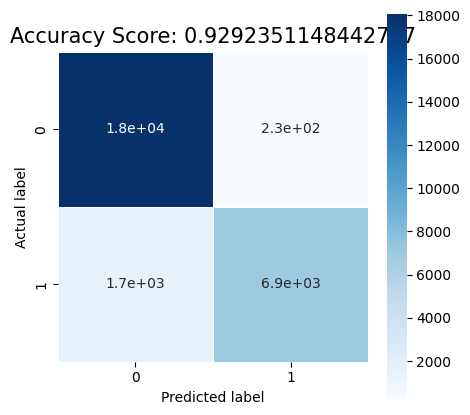

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model_2.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[18057   231]
 [ 1673  6945]]


CONFUSION MATRIX

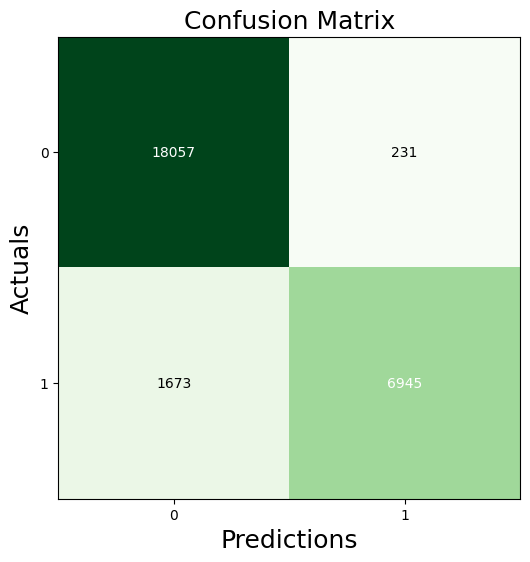

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

ACCURACY OF MODEL

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9292351148442727


PREDICT NEW VALUES

In [ ]:
import pandas as pd

d1 = pd.DataFrame(columns=['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan'
       ])
parts = int(input("Enter the number of day rows:"))

for _ in range(parts):
    a = input("Enter BidsPortfolioManager:: ")
    b = input("Enter Interest:: ")
    c = input("Enter  MonthlyPayment:: ")
    d = input("Enter Rating:: ")
    e = input("Enter PrincipalPaymentsMade:: ")
    f = input("Enter NoOfPreviousLoansBeforeLoan:: ")
    g = input("Enter  PrincipalBalance:: ")
    h = input("Enter  InterestAndPenaltyBalance:: ")
    i = input("Enter  AmountOfPreviousLoansBeforeLoan:: ")
    j = input("Enter  PreviousRepaymentsBeforeLoan:: ")

    d2 = pd.DataFrame(data=[[a,b,c,d,e,f,g,h,i,j]],columns=['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan'
       ])
    data = pd.concat([d1,d2], axis=0)

data.index = range(len(data.index))
data

Enter the number of day rows:1
Enter BidsPortfolioManager:: 0
Enter Interest:: 0
Enter  MonthlyPayment:: 0
Enter Rating:: 0
Enter PrincipalPaymentsMade:: 0
Enter NoOfPreviousLoansBeforeLoan:: 0
Enter  PrincipalBalance:: 0
Enter  InterestAndPenaltyBalance:: 0
Enter  AmountOfPreviousLoansBeforeLoan:: 0
Enter  PreviousRepaymentsBeforeLoan:: 0


,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan
0,0,0,0,0,0,0,0,0,0,0


TAKE A DATA AND CONVERT INTO INPUT AND TEST

In [ ]:
train_input=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values



ACTUAL VALUE

PREDICTED OUTPUT

In [ ]:
predict= model.predict(train_input)
print(predict)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df.head()

,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


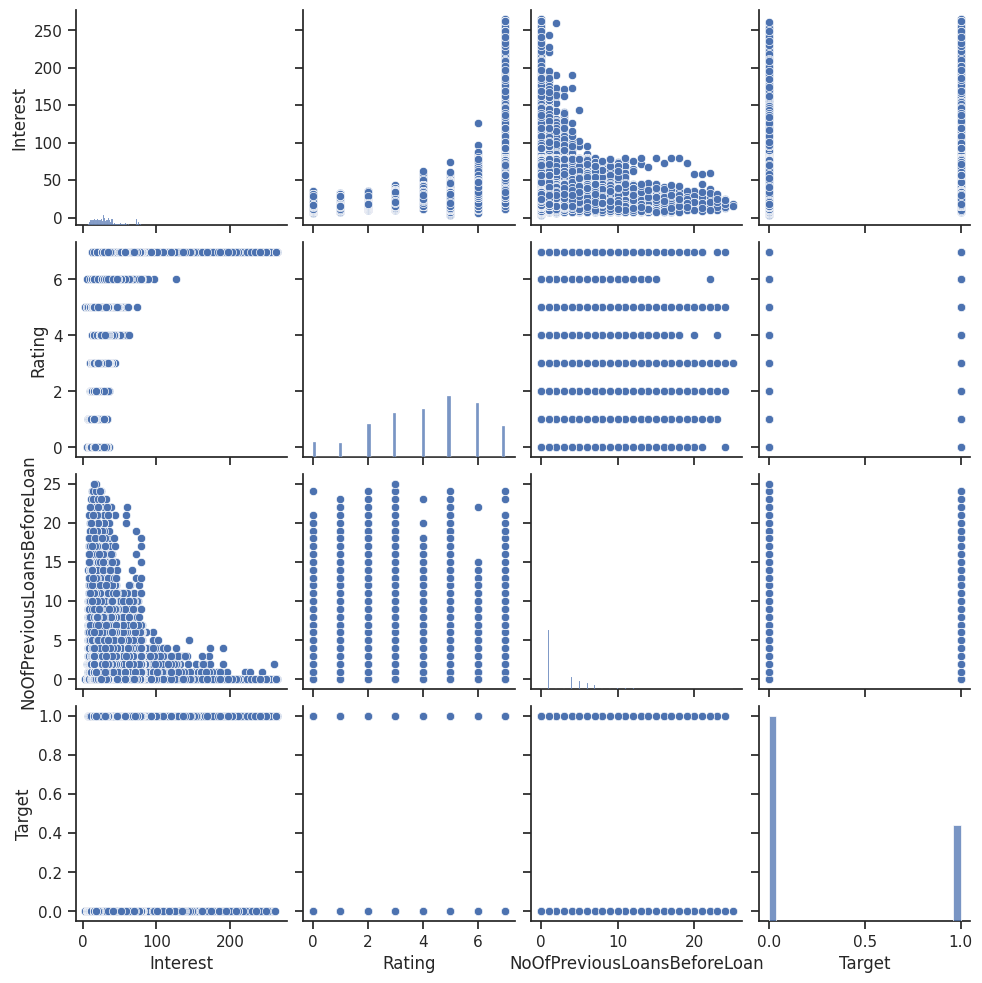

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["Interest", "Rating",'NoOfPreviousLoansBeforeLoan','Target'])
